## Calculating coordination numbers

In this example, we will read in a configuration from an MD simulation and then calculate the coordination number distribution.  
This example assumes that you read the [basic example](https://pyscal.readthedocs.io/en/latest/examples.html#basic-examples).

In [1]:
import pyscal.core as pc
import numpy as np
import matplotlib.pyplot as plt

### Read in a file

The first step is setting up a system. We can create atoms and simulation box using the ``pyscal.crystal_structures`` module. Let us start by importing the module.

In [2]:
import pyscal.crystal_structures as pcs

In [3]:
atoms, box = pcs.make_crystal('bcc', lattice_constant= 4.00, repetitions=[6,6,6])

The above function creates an bcc crystal of 6x6x6 unit cells with a lattice constant of 4.00 along with a simulation box that encloses the particles. We can then create a ``System`` and assign the atoms and box to it.

In [4]:
sys = pc.System()
sys.atoms = atoms
sys.box = box

### Calculating neighbors

We start by calculating the neighbors of each atom in the system. There are two ways to do this, using a ``cutoff`` method and using a ``voronoi`` polyhedra method. We will try with both of them. First we try with cutoff system - which has three sub options. We will check each of them in detail.

#### Cutoff method

Cutoff method takes cutoff distance value and finds all atoms within the cutoff distance of the host atom.

In [5]:
sys.find_neighbors(method='cutoff', cutoff=4.1)

Now lets get all the atoms.

In [6]:
atoms = sys.atoms

let us try accessing the coordination number of an atom

In [7]:
atoms[0].coordination

14

As we would expect for a bcc type lattice, we see that the atom has 14 neighbors (8 in the first shell and 6 in the second). Lets try a more interesting example by reading in a bcc system with thermal vibrations. Thermal vibrations lead to distortion in atomic positions, and hence there will be a distribution of coordination numbers.

In [8]:
sys = pc.System()
sys.read_inputfile('conf.dump')
sys.find_neighbors(method='cutoff', cutoff=3.6)
atoms = sys.atoms

We can loop over all atoms and create a histogram of the results 

In [9]:
coord = [atom.coordination for atom in atoms]

Now lets plot and see the results

Text(0.5, 1.0, 'Cutoff method')

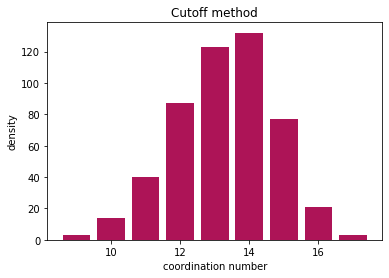

In [10]:
nos, counts = np.unique(coord, return_counts=True)
plt.bar(nos, counts, color="#AD1457")
plt.ylabel("density")
plt.xlabel("coordination number")
plt.title("Cutoff method")

### Adaptive cutoff methods

``pyscal`` also has adaptive cutoff methods implemented. These methods remove the restriction on having the same cutoff. A distinct cutoff is selected for each atom during runtime. ``pyscal`` uses two distinct algorithms to do this - ``sann`` and ``adaptive``. Please check the [documentation](https://pyscal.readthedocs.io/en/latest/nearestneighbormethods.html) for a explanation of these algorithms.  For the purpose of this example, we will use the `adaptive` algorithm.

``adaptive algorithm``

In [11]:
sys.find_neighbors(method='cutoff', cutoff='adaptive', padding=1.5)
atoms = sys.atoms
coord = [atom.coordination for atom in atoms]

Now lets plot

Text(0.5, 1.0, 'Cutoff adaptive method')

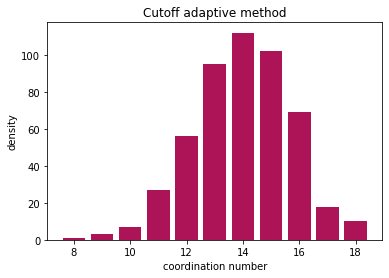

In [12]:
nos, counts = np.unique(coord, return_counts=True)
plt.bar(nos, counts, color="#AD1457")
plt.ylabel("density")
plt.xlabel("coordination number")
plt.title("Cutoff adaptive method")

The adaptive method also gives similar results!

### Voronoi method

Voronoi method calculates the voronoi polyhedra of all atoms. Any atom that shares a voronoi face area with the host atom are considered neighbors. Voronoi polyhedra is calculated using the [Voro++](http://math.lbl.gov/voro++/) code. However, you dont need to install this specifically as it is linked to pyscal.

In [13]:
sys.find_neighbors(method='voronoi')

Once again, let us get all atoms and find their coordination

In [14]:
atoms = sys.atoms
coord = [atom.coordination for atom in atoms]

And visualise the results

Text(0.5, 1.0, 'Voronoi method')

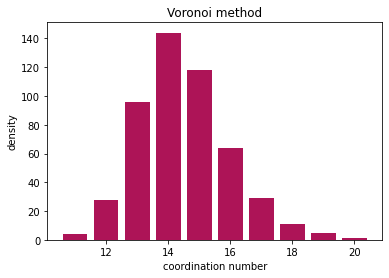

In [15]:
nos, counts = np.unique(coord, return_counts=True)
plt.bar(nos, counts, color="#AD1457")
plt.ylabel("density")
plt.xlabel("coordination number")
plt.title("Voronoi method")

### Finally..

All methods find the coordination number, and the results are comparable. Cutoff method is very sensitive to the choice of cutoff radius, but voronoi method can slightly overestimate the neighbors due to thermal vibrations. 